In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving avocado.csv to avocado.csv


In [3]:
df=pd.read_csv('avocado.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [ ]:
df.shape

(18249, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

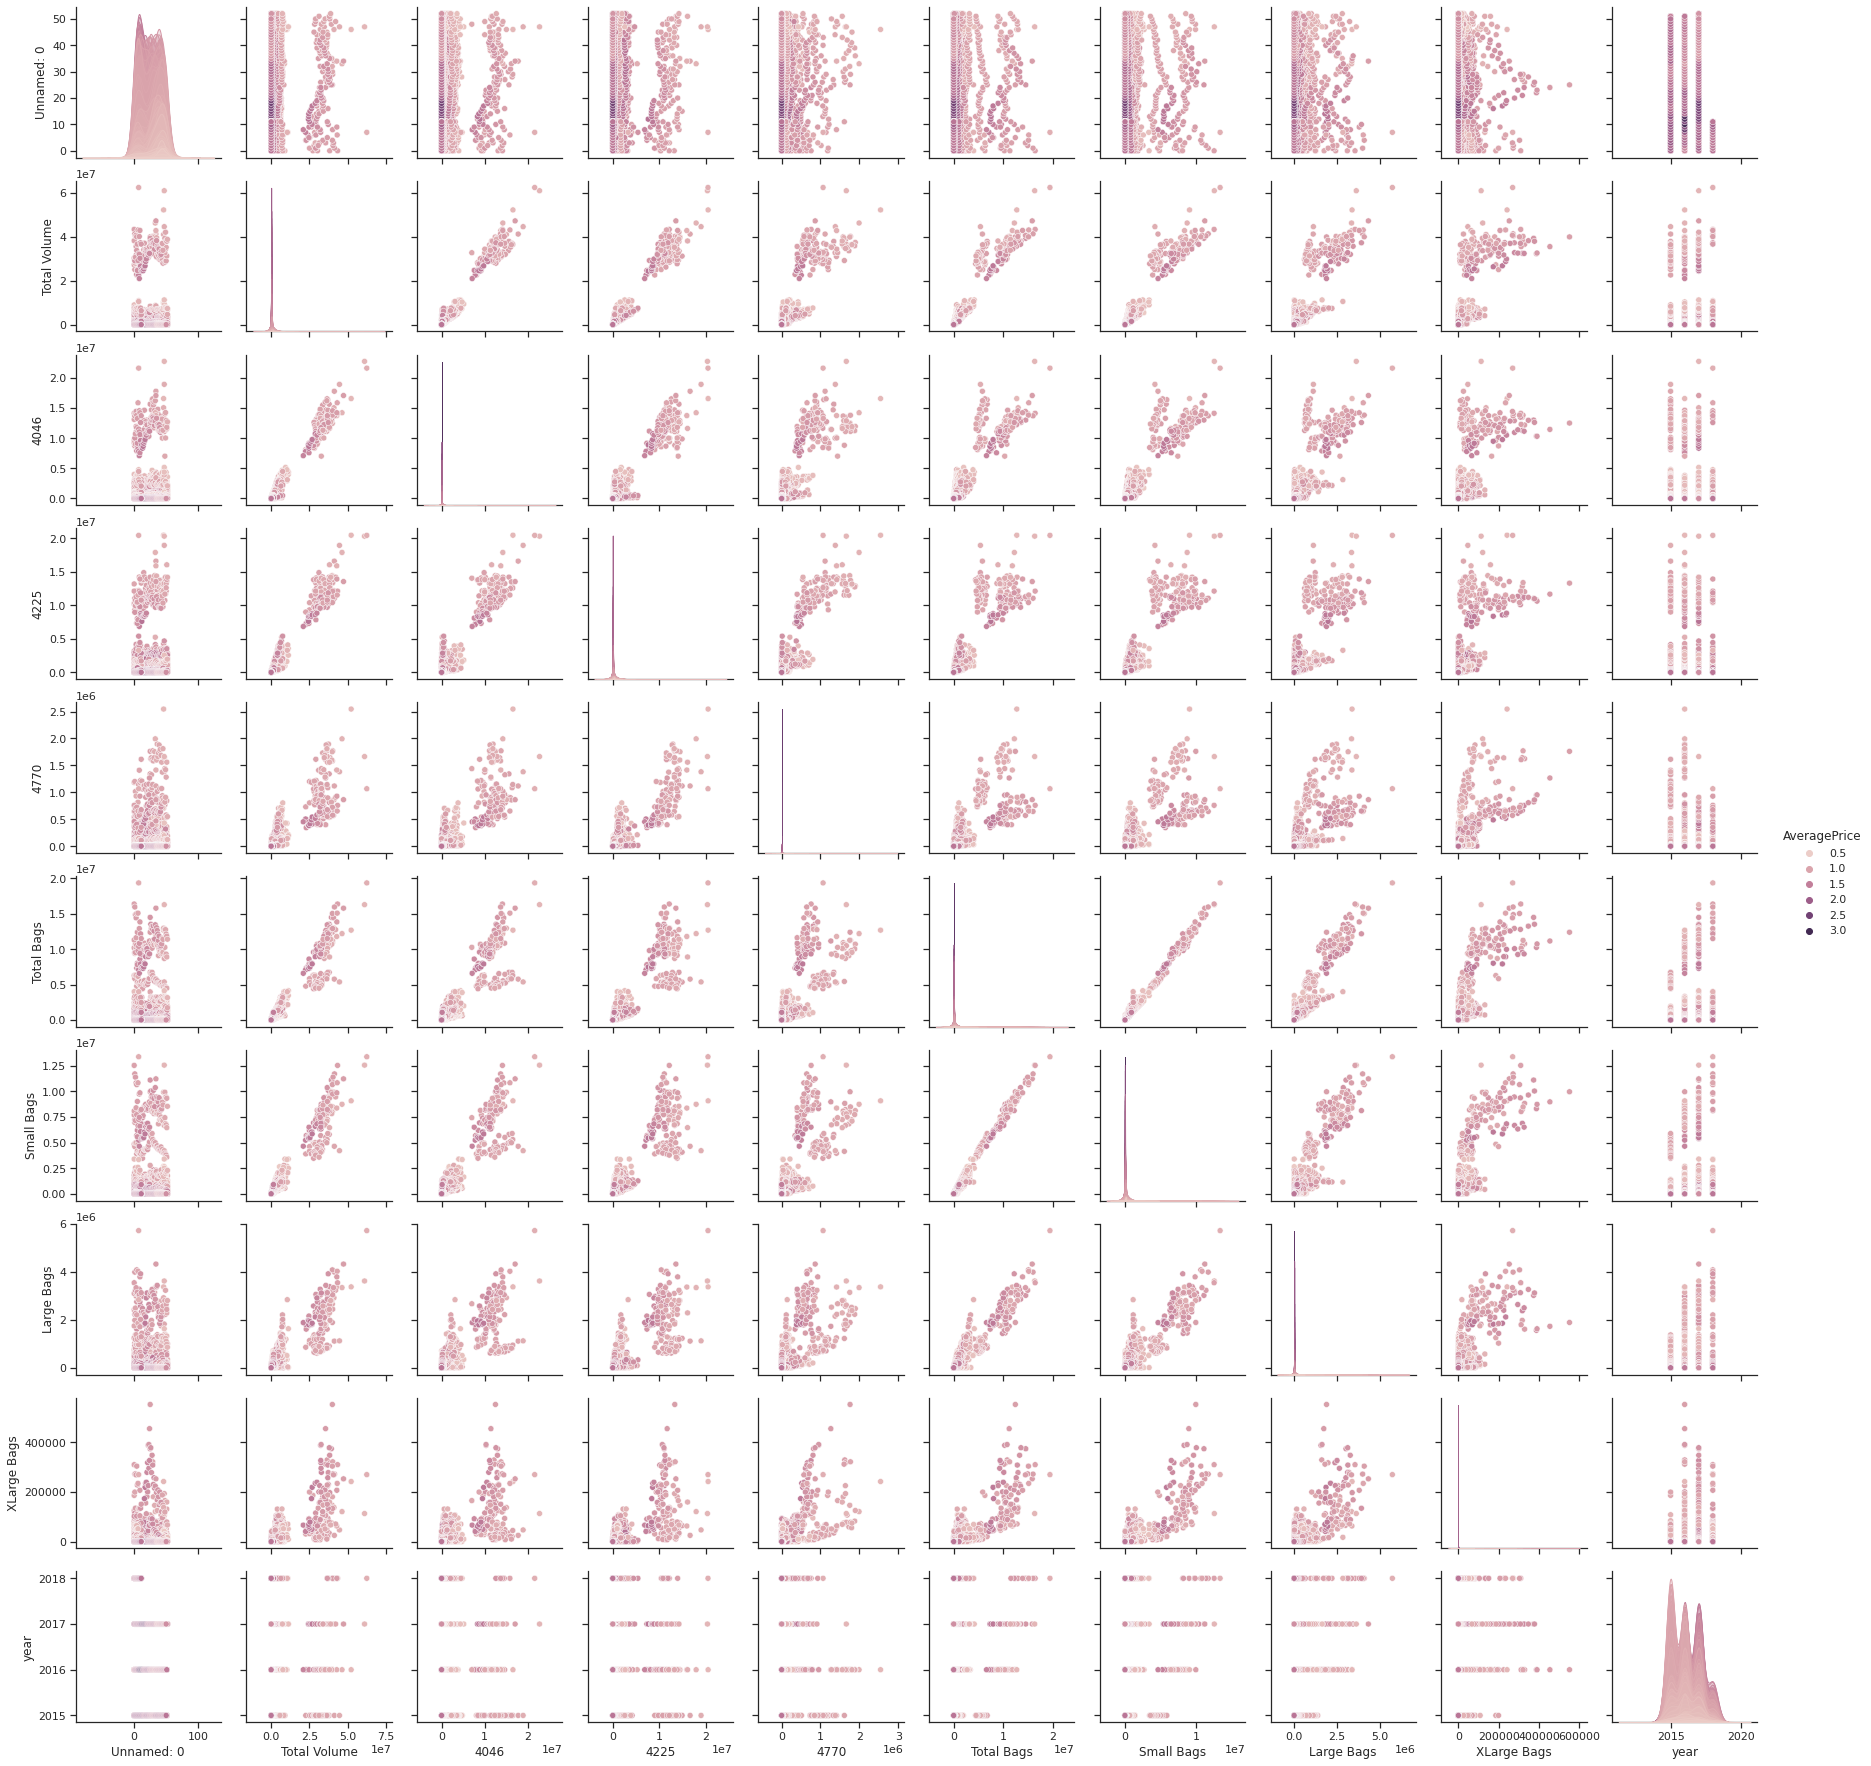

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="AveragePrice")

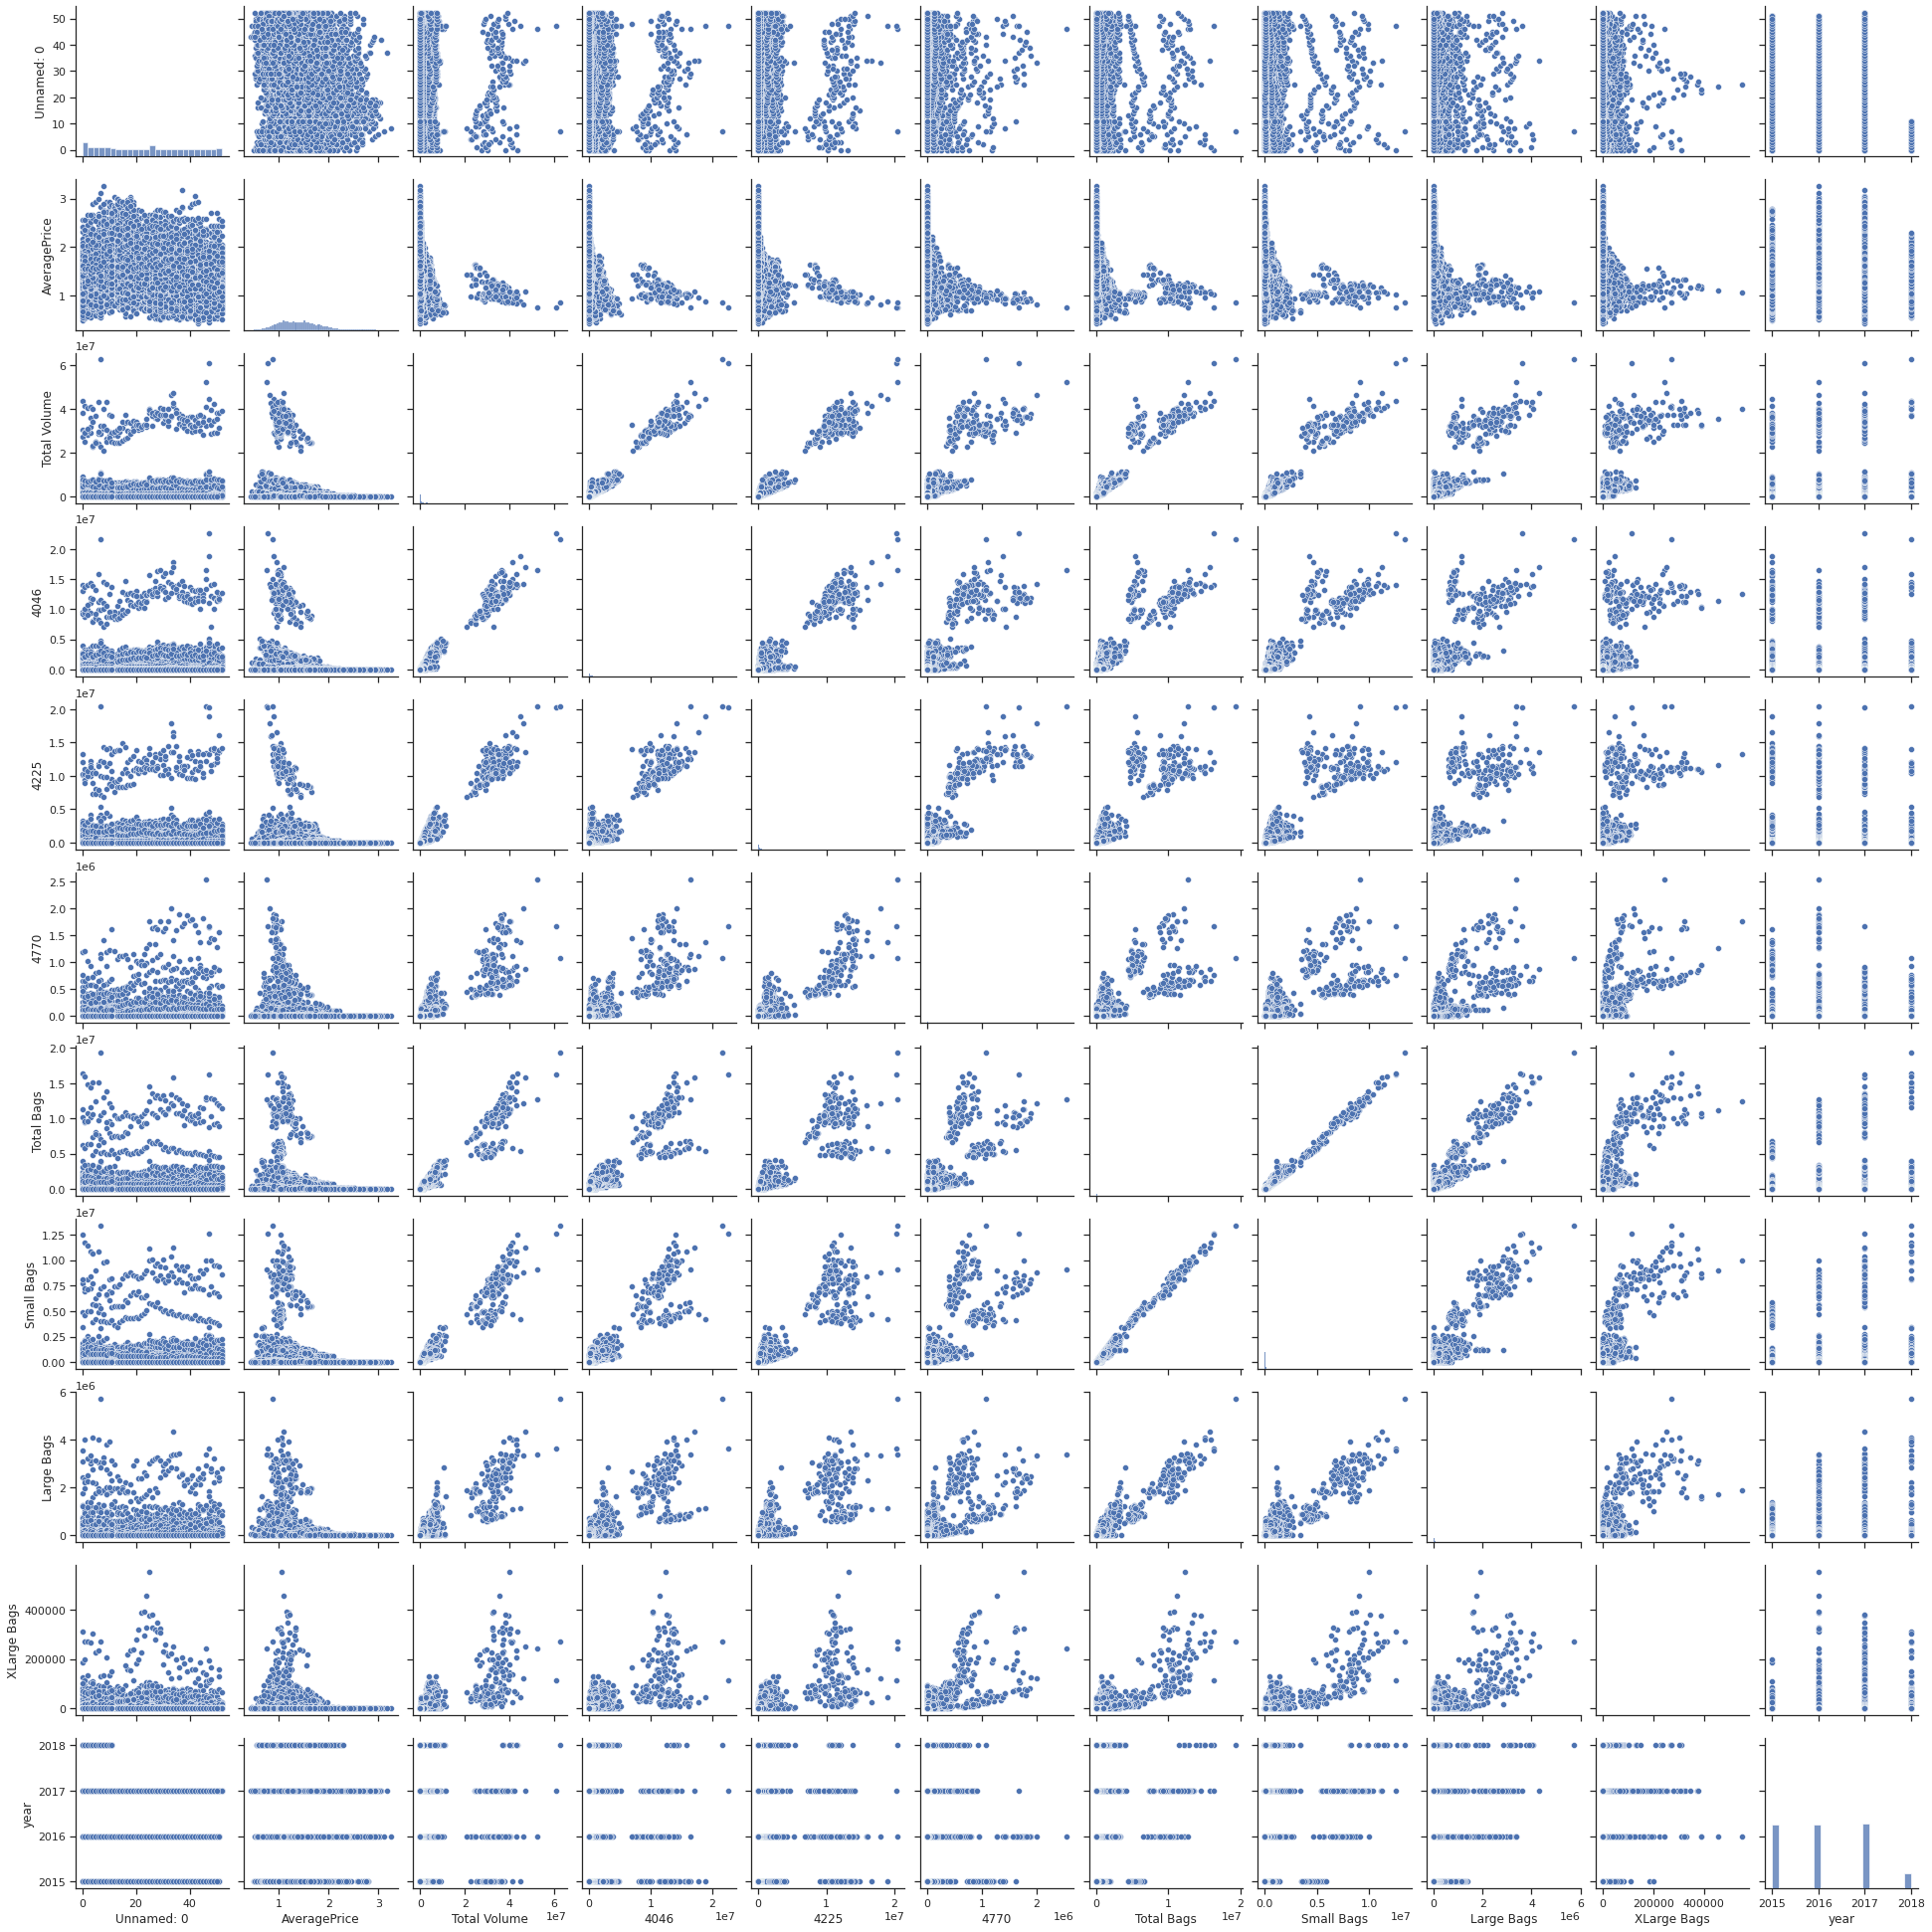

In [ ]:
sns.pairplot(df)

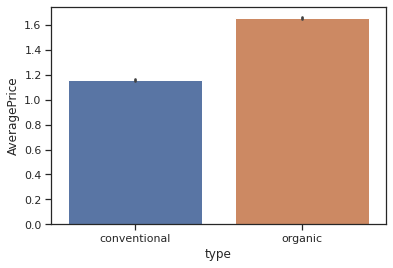

In [ ]:
sns.barplot(x="type",y="AveragePrice",data= df)

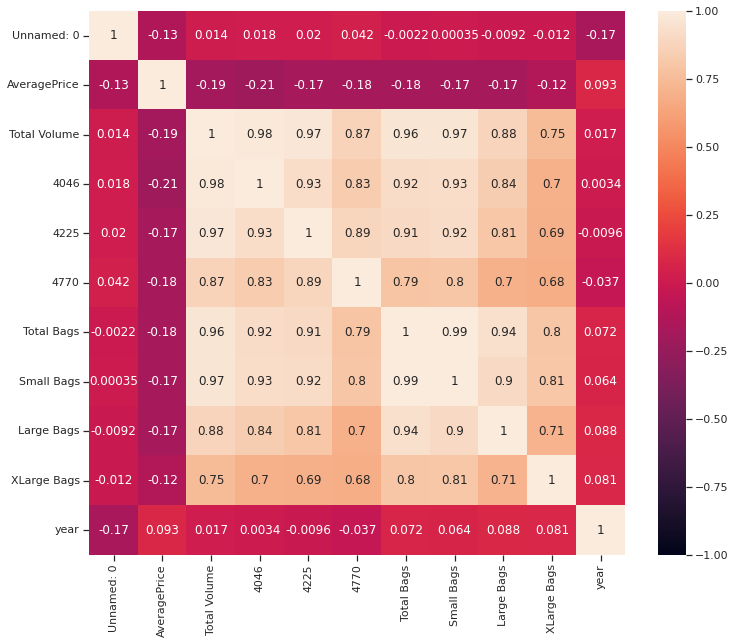

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

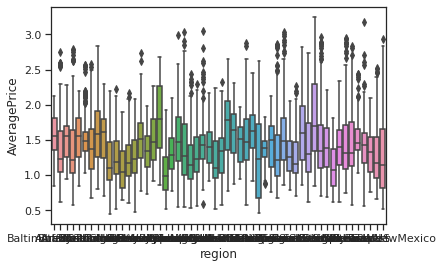

In [ ]:
sns.boxplot(x='region',y='AveragePrice',data=df)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
X=df

In [5]:
X=X.drop(columns=['Unnamed: 0', 'Date','year','region'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,df['AveragePrice'],test_size=0.30)

In [ ]:
X_train['type'].value_counts()

conventional    6390
organic         6384
Name: type, dtype: int64

X_train=pd.get_dummies(X_train, columns = ['type'])


In [13]:
X_train.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
16252,2.36,68542.66,5993.84,27972.54,1229.15,33347.13,33342.24,4.89,0.00,organic
528,0.99,135237.01,58162.23,31821.24,23764.43,21489.11,14668.10,3691.47,3129.54,conventional
1330,1.14,3039403.06,734816.30,1377202.12,207708.91,719675.73,661787.82,56794.41,1093.50,conventional
17598,1.19,17014.23,1203.87,2904.22,23.07,12883.07,12476.57,406.50,0.00,organic
11798,1.00,625259.00,170184.00,269330.00,6905.00,178838.00,126058.00,52779.00,0.00,organic


In [14]:
X_train=pd.get_dummies(X_train, columns = ['type'])

In [15]:
X_train.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic
16252,2.36,68542.66,5993.84,27972.54,1229.15,33347.13,33342.24,4.89,0.00,0,1
528,0.99,135237.01,58162.23,31821.24,23764.43,21489.11,14668.10,3691.47,3129.54,1,0
1330,1.14,3039403.06,734816.30,1377202.12,207708.91,719675.73,661787.82,56794.41,1093.50,1,0
17598,1.19,17014.23,1203.87,2904.22,23.07,12883.07,12476.57,406.50,0.00,0,1
11798,1.00,625259.00,170184.00,269330.00,6905.00,178838.00,126058.00,52779.00,0.00,0,1


In [7]:
X_test=pd.get_dummies(X_test, columns = ['type'])

In [16]:
X_test.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic
7139,1.74,1221327.78,36138.61,791416.43,4113.73,389659.01,340915.45,48526.89,216.67,1,0
10727,1.90,5599.89,7.89,687.58,0.00,4904.42,4904.42,0.00,0.00,0,1
3137,0.99,6696300.05,2683109.80,1878139.55,133979.15,2001071.55,1924479.53,46601.83,29990.19,1,0
6500,1.49,225681.54,53508.78,103642.10,52.70,68477.96,61430.73,7047.23,0.00,1,0
1360,0.94,159318.32,97774.21,20102.72,5054.46,36386.93,24437.20,11949.73,0.00,1,0


In [17]:
sc=StandardScaler()

In [18]:
sc.fit(X_train)

StandardScaler()

In [19]:
X_train=sc.transform(X_train)

In [20]:
X_test=sc.transform(X_test)

In [22]:
X_test=pd.DataFrame(X_test,columns=['AveragePrice',	'Total Volume' ,	'4046',	'4225'	,'4770',	'Total Bags',	'Small Bags',	'Large Bags',	'XLarge Bags'	,'type_conventional',	'type_organic'])

In [23]:
X_test.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic
0,0.837923,0.100115,-0.202722,0.401479,-0.174580,0.141225,0.199901,-0.028324,-0.160898,0.997654,-0.997654
1,1.237049,-0.242733,-0.230659,-0.243865,-0.211646,-0.234442,-0.233965,-0.220459,-0.172443,-1.002351,1.002351
2,-1.032979,1.644111,1.843921,1.288397,0.995527,1.714581,2.244639,-0.035946,1.425514,0.997654,-0.997654
3,0.214289,-0.180668,-0.189292,-0.159840,-0.211171,-0.172370,-0.160977,-0.192556,-0.172443,0.997654,-0.997654
4,-1.157706,-0.199383,-0.155065,-0.228020,-0.166104,-0.203703,-0.208744,-0.173146,-0.172443,0.997654,-0.997654


In [24]:
X_train=pd.DataFrame(X_train,columns=X_test.columns)

In [25]:
X_train.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type_conventional,type_organic
0,2.384535,-0.224982,-0.226030,-0.221597,-0.200571,-0.206671,-0.197246,-0.220439,-0.172443,-1.002351,1.002351
1,-1.032979,-0.206174,-0.185693,-0.218456,0.002476,-0.218249,-0.221358,-0.205843,-0.005693,0.997654,-0.997654
2,-0.658798,0.612830,0.337497,0.879562,1.659844,0.463448,0.614219,0.004410,-0.114178,0.997654,-0.997654
3,-0.534072,-0.239514,-0.229734,-0.242056,-0.211438,-0.226652,-0.224188,-0.218849,-0.172443,-1.002351,1.002351
4,-1.008034,-0.067983,-0.099078,-0.024616,-0.149430,-0.064617,-0.077529,-0.011488,-0.172443,-1.002351,1.002351


In [27]:
xgb=XGBRegressor(eta=0.3,max_depth=10,min_child_weight=1)
xgb.fit(X_train, y_train)

[07:25:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.3, max_depth=10)

In [28]:
Y_pred = xgb.predict(X_test)
score = xgb.score(X_train, y_train)
print('Training Score:', score)
score = xgb.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred})

Training Score: 0.9999997320125837
Testing Score: 0.9999952630587167


eta is like learning rate it shrinks the weight hence used 0.3 since typically small values are used for small shrinking 
min child weight is used to control overfitting similar to min_child_leaf in other tree methods  too high value can result in underfittinf 
max depth ios similar to other tree based ensembles this denotes maximum depth of a tree 
lamda and alpha are l2,l1 regularization terms left default 
subsample dictates the fraction of observation taken for each tree 